In [31]:
import numpy as np
import tensorflow.compat.v1 as tf
import time
import math
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bedtools is already the newest version (2.26.0+dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Берём наш файл с участками с пересечением вторичной структуры и гистоновой метки.

In [32]:
H3F3A_ZDNA = 'H3F3A.intersect_with_DeepZ.bed'

H3F3A_ZDNA = pd.read_csv(H3F3A_ZDNA, sep='\t', names=['chr', 'start', 'end'])
H3F3A_ZDNA['len'] = H3F3A_ZDNA['end'] - H3F3A_ZDNA['start']
H3F3A_ZDNA

,chr,start,end,len
0,chr1,934027,934047,20
1,chr1,1004735,1004904,169
2,chr1,1141965,1141990,25
3,chr1,1243681,1243782,101
4,chr1,1310438,1310457,19
...,...,...,...,...
10755,chrX,153990863,153990933,70
10756,chrX,153990948,153990999,51
10757,chrX,154299314,154299354,40
10758,chrX,154299796,154299918,122


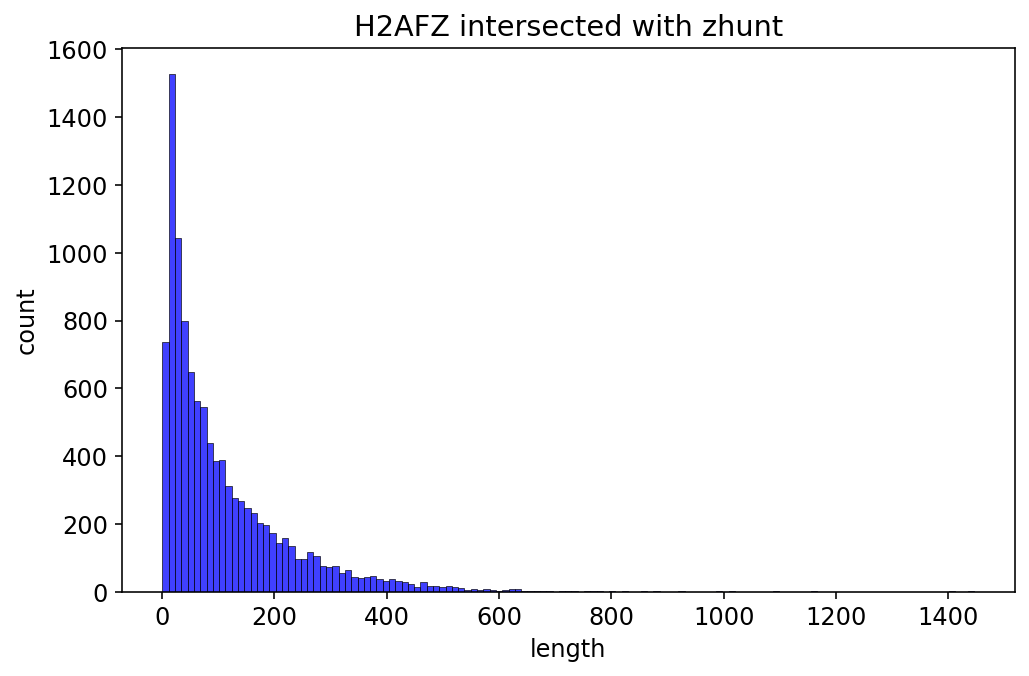

In [33]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

sns.histplot(H3F3A_ZDNA['len'], color = 'blue')
plt.title('H2AFZ intersected with zhunt')
plt.xlabel('length')
plt.ylabel('count')
plt.show()

Берём те объекты, которых больше всего.

In [34]:
H3F3A_ZDNA = H3F3A_ZDNA[(H3F3A_ZDNA['len'] == 20)]
H3F3A_ZDNA.drop(H3F3A_ZDNA[H3F3A_ZDNA['len'] != 20].index, inplace=True)
H3F3A_ZDNA['center'] = (H3F3A_ZDNA['end'] + H3F3A_ZDNA['start']) // 2
H3F3A_ZDNA['start'] = H3F3A_ZDNA['center'] - 10
H3F3A_ZDNA['end'] = H3F3A_ZDNA['end'] - 10
H3F3A_ZDNA

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,chr,start,end,len,center
0,chr1,934027,934037,20,934037
98,chr1,16693790,16693800,20,16693800
142,chr1,21113393,21113403,20,21113403
380,chr1,51433791,51433801,20,51433801
381,chr1,51433864,51433874,20,51433874
...,...,...,...,...,...
10220,chr20,47897627,47897637,20,47897637
10328,chr21,34851719,34851729,20,34851729
10678,chrX,47517958,47517968,20,47517968
10685,chrX,53123800,53123810,20,53123810


In [35]:
!wget http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
!chmod a+x twoBitToFa

--2021-12-01 18:11:44--  http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9367560 (8.9M)
Saving to: ‘twoBitToFa’

twoBitToFa          100%[===================>]   8.93M  30.1MB/s    in 0.3s    

2021-12-01 18:11:45 (30.1 MB/s) - ‘twoBitToFa’ saved [9367560/9367560]



In [36]:
for i in range(H3F3A_ZDNA.shape[0]):
    name = H3F3A_ZDNA.iloc[i, :]['chr']
    start = H3F3A_ZDNA.iloc[i, :]['start']
    end = H3F3A_ZDNA.iloc[i, :]['end']

    file_name = str(i) + 's.fa'
    
    !./twoBitToFa http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit $file_name -seq=$name -start=$start -end=$end

In [37]:
!cat *s.fa > pos.fa

In [38]:
genome = pd.read_csv('Genome.bed', sep='\t', header=None)
genome

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,66999043,67216822,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
1,chr1,66999043,67216822,NM_001376535.1,0,+,67000041,67208778,0,26,"47,123,64,25,72,57,55,176,12,12,25,52,86,93,75...","0,885,92486,99709,102583,106416,109449,110183,..."
2,chr1,66999275,67216822,NM_001376554.1,0,+,67000041,67208778,0,21,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
3,chr1,66999275,67216822,NM_001376551.1,0,+,67000041,67208778,0,22,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
4,chr1,66999275,67216822,NM_001308203.2,0,+,67000041,67208778,0,22,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
87140,chr7_gl000195_random,42937,86735,NM_001242480.3,0,-,44723,49117,0,4,"1986,165,60,218,","0,6017,31183,43580,"
87141,chr7_gl000195_random,42937,86735,NM_001347680.2,0,-,46775,49117,0,3,"3864,165,218,","0,6017,43580,"
87142,chr7_gl000195_random,42937,86735,NM_001347681.2,0,-,44723,49117,0,3,"1986,165,218,","0,6017,43580,"
87143,chr7_gl000195_random,42937,86735,NR_144628.2,0,-,86735,86735,0,2,"1986,218,","0,43580,"


Найдём теперь наши классы.

In [40]:
!bedtools subtract -a Genome.bed -b DeepZ.bed > tmp.bed
!bedtools subtract -a tmp.bed -b H3F3A.merge.hg19.bed > neg.bed

In [43]:
neg = pd.read_csv('neg.bed', sep='\t', names=['chr', 'start', 'end', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
neg['len'] = neg['end'] - neg['start']
neg.drop(neg[neg['len'] != 20].index, inplace=True)
neg.drop(['len'], axis=1, inplace=True)
neg.to_csv('neg_.bed', index=None, sep="\t", header=None)

In [44]:
!./twoBitToFa  http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit -bed=neg_.bed neg.fa

**Мы получили данные. Теперь обучим нейронку.**

In [45]:
__author__ = 'jasperz'
import os
import numpy as np
import tensorflow.compat.v1 as tf
import time
import math
import sys

In [79]:
# An object of this class represents a neural network, which you can build, print, train, evaluate, save and load.
# Below, the functions are discussed in detail.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
class NetworkModel:
    tf.disable_v2_behavior()

    # The constructor function
    def __init__(self, file_to_load = None):
        tf.reset_default_graph()
        self.all_layers = []

        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1)
        config = tf.ConfigProto(gpu_options=gpu_options)
        config.gpu_options.allow_growth = True

        self.sess = tf.Session(config=config)

        if not file_to_load:
            self.X_placeholder = tf.placeholder(tf.float32, [None, 200, 4],name='X_placeholder')
            self.Y_placeholder = tf.placeholder(tf.float32, [None, 2],name='Y_placeholder')
            self.loaded = False
            self.nn = None
        else:
            self.loaded = True
            self._loadNetworkParameters('models/'+file_to_load)
            self.X_placeholder = tf.get_default_graph().get_tensor_by_name('X_placeholder:0')
            self.Y_placeholder = tf.get_default_graph().get_tensor_by_name('Y_placeholder:0')
            self.predictions_softmax = tf.get_default_graph().get_tensor_by_name('softmax_prediction:0')

    # Adding the input layer
    def addInputLayer(self):
        assert len(self.all_layers) == 0, 'The input layer should be the first layer of the network, and can only be added once.'
        self.all_layers.append(('Input layer','',self.X_placeholder))

    # Adding a convolution layer
    def addConvLayer(self, num_of_filters, filter_width, zero_padding = True):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert zero_padding in (True,False), 'zero_padding should be True or False (boolean)'
        assert 0 < num_of_filters < 500, 'The number of filters specified should be a positive number, smaller than 500'
        assert 0 < filter_width < 64, 'The width of your filters should be a positive number, smaller than 64'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 'Fully-connected layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a convolutional layer after a fully-connected layer'
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a convolutional layer after a softmax layer'
        prev_width = self.all_layers[-1][-1].shape[1]
        assert zero_padding or prev_width >= filter_width, 'You cannot add a (non-zeropadded) convolution of width {} when the previous layer has an output width of {}'.format(filter_width,prev_width)
        self.all_layers.append(('Convolutional layer',
                                '{} filters, width {}, {}zero padding, with ReLU'.format(num_of_filters,
                                                                                         filter_width,
                                                                                         'no ' if not zero_padding else ''),
                                tf.layers.conv1d(self.all_layers[-1][-1],
                                                 filters=num_of_filters,
                                                 kernel_size=filter_width,
                                                 activation=tf.nn.relu,
                                                 padding='same' if zero_padding else 'valid')))

    # Adding a max pooling layer
    def addMaxPoolLayer(self, pool_size):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Fully-connected layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a pooling layer after a fully-connected layer'
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a pooling layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 0 < pool_size < 50, 'The pool size should be lower than 50'
        prev_width = self.all_layers[-1][-1].shape[1]
        assert prev_width >= pool_size, 'You cannot add a pooling layer with pool size {} when the previous layer has an output width of {}'.format(pool_size,prev_width)
        self.all_layers.append(('Max pooling layer',
                                'pool size {}'.format(pool_size),
                                tf.layers.max_pooling1d(self.all_layers[-1][-1],
                                                        pool_size=pool_size,
                                                        strides=pool_size)))

    # Adding a fully-connected layer
    def addFullyConnectedLayer(self,num_of_neurons):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a fully-connected layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 0 < num_of_neurons < 1000, 'The amount of neurons in this layer should be a positive number, lower than 2000'
        if len(self.all_layers[-1][-1].shape) > 2:
            self.all_layers.append(('Flatten layer',
                                    '',
                                   tf.layers.flatten(self.all_layers[-1][-1])))
        self.all_layers.append(('Fully-connected layer',
                                '{} neurons, with ReLU'.format(num_of_neurons),
                                tf.layers.dense(self.all_layers[-1][-1],num_of_neurons)))

    # Adding an output layer
    def addOutputLayer(self):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a softmax (output) layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        if len(self.all_layers[-1][-1].shape) > 2:
            self.all_layers.append(('Flatten layer',
                                    '',
                                    tf.contrib.layers.flatten(self.all_layers[-1][-1])))
        # assert no output layer yet
        # assert # of layers
        self.all_layers.append(('Softmax (output) layer',
                                '2 neurons',
                                tf.layers.dense(self.all_layers[-1][-1], 2,name='logits')))

    # Printing out an overview of the layers
    def printDetails(self):
        print('####################################')
        print('Network information:')
        # count all parameters:
        total_parameters = 0
        # iterating over all variables
        for variable in tf.trainable_variables():
            local_parameters = 1
            shape = variable.get_shape()  # getting shape of a variable
            for i in shape:
                local_parameters *= i.value  # mutiplying dimension values
            total_parameters += local_parameters
        print('This network has {} trainable parameters.'.format(total_parameters))

        for i,(name,info,l) in enumerate(self.all_layers):
            try:
                print('{: >2d}. {:23} {:50} -> Output size: {}'.format(i, name, info, l.shape))
            except AttributeError:
                pass
        print('')
        print('####################################')

    # Function to train the network
    def train(self, trainX, trainY, validX, validY, n_epochs):
        print('####################################')
        assert 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot train a model without an input layer'
        assert 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot train a model without an output layer'
        assert self.loaded == False, 'You can not (re)train a model loaded from a file.'
        assert 1 < n_epochs < 100, 'The number of epochs should be greater than 1 and lower than 100'
        assert all(type(l) == list for l in (trainX, trainY, validX, validY)), 'trainX, trainY, validX and validY should all be lists'
        assert all(len(l) > 0 for l in (trainX, trainY, validX, validY)), 'trainX, trainY, validX and validY should not be empty'

        assert len(trainX) == len(trainY), 'trainX and trainY should have the same amount of samples'
        assert len(trainX[0]) == 50 and len(trainX[0][0]) == 4 and type(trainX[0][0][0]) == int, 'trainX should have size (_, 200, 4) and should contain integers'
        assert type(trainY[0]) == int, 'trainY should have length n (for n sequences) and should contain integers'

        assert len(validX) == len(validY), 'validX and validY should have the same amount of samples'
        assert len(validX[0]) == 50 and len(validX[0][0]) == 4 and type(validX[0][0][0]) == int, 'validX should have size (_, 200, 4) and should contain integers'
        assert type(validY[0]) == int, 'validY should have length n (for n sequences) and should contain integers'
        # assert input and output layer
        self._prepare_training()

        self.sess.run(tf.global_variables_initializer())
        self.sess.run(tf.local_variables_initializer())
        train_dataset = _Dataset(trainX, trainY)
        valid_dataset = _Dataset(validX, validY)
        self._printOutputClasses(train_dataset,'training')
        self._printOutputClasses(valid_dataset,'validation')

        best_valid_score = 999999
        print()
        print(' {:^5} | {:^14} | {:^14} | {:^11} | {:^11} | {:^8} '.format('epoch','train cost','valid cost','train acc','valid acc','time'))
        print('-{:-^6}+{:-^16}+{:-^16}+{:-^13}+{:-^13}+{:-^9}-'.format('','','','','',''))

        tr_cost, tr_acc = self._evaluateSet(train_dataset)
        va_cost, va_acc = self._evaluateSet(valid_dataset)
        print(' {:5d} |   {:2.8f}   |   {:2.8f}   |  {:1.7f}  | {:1.7f}  | {:4.2f}s '.format(0,tr_cost,tr_acc,va_cost,va_acc,0))

        for epoch in range(1,n_epochs+1):
            epoch_start_time = time.time()
            epoch_finished = False
            while not epoch_finished:
                batch_x, batch_y, epoch_finished = train_dataset.next_batch(256)
                self.sess.run(self.train_op, feed_dict={self.X_placeholder: batch_x, self.Y_placeholder: batch_y})
            tr_cost, tr_acc = self._evaluateSet(train_dataset)
            va_cost, va_acc = self._evaluateSet(valid_dataset)

            if va_cost < best_valid_score:
                best_valid_score = va_cost
                message = '-> model selected'
                self._storeNetworkParameters('models/tmp')
            else:
                message = ''
            print(' {:5d} |   {:2.8f}   |   {:2.8f}   |  {:1.7f}  | {:1.7f}  | {:4.2f}s {}'.format(epoch,tr_cost,va_cost,tr_acc,va_acc,time.time()-epoch_start_time,message))

        self._loadNetworkParameters('models/tmp')
        print('Finished training')
        print('####################################')

    # Function to generate predictions for a certain dataset.
    def generatePredictions(self, testX):
        assert len(testX[0]) == 200 and len(testX[0][0]) == 4 and type(testX[0][0][0]) == int, 'testX should have size (_, 200, 4) and should contain integers'
        assert self.loaded or 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot test a model without an input layer'
        assert self.loaded or 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot test a model without an output layer'
        # assert input and output layer
        all_preds = []
        for i in range(math.ceil(len(testX)/256)):
            batch_x = np.asarray(testX[i*256:(i+1)*256])
            preds = self.sess.run(self.predictions_softmax,feed_dict={self.X_placeholder:batch_x})
            for i in range(len(preds)):
                all_preds.append((preds[i][0],preds[i][1]))
        return all_preds

    # Function to save the model
    def saveModel(self, file_to_save_to):
        assert 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot save a model without an input layer'
        assert 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot save a model without an output layer'
        # assert input and output layer
        assert not self.loaded, 'You cannot save a loaded model again.'
        self._storeNetworkParameters('models/'+file_to_save_to)

    def _prepare_training(self):
        # assert all layers -1 == output layer
        gs = tf.train.get_or_create_global_step()
        self.predictions_softmax = tf.nn.softmax(self.all_layers[-1][-1],name='softmax_prediction')

        self.cost_f = tf.losses.softmax_cross_entropy(onehot_labels=self.Y_placeholder, logits=self.all_layers[-1][-1])
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        self.train_op = self.optimizer.minimize(loss=self.cost_f,global_step=gs)

        self.acc_f, self.acc_op = tf.metrics.accuracy(labels=tf.argmax(self.Y_placeholder, axis=1),predictions=tf.argmax(self.predictions_softmax, axis=1),name='metric_acc')
        self.metric_var_initializer = tf.variables_initializer(var_list=tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES, scope='metric'))

    def _evaluateSet(self, dataset):
        self.sess.run(self.metric_var_initializer)
        costs = []
        batches_done = False
        while not batches_done:
            batch_x, batch_y, epoch_finished = dataset.next_batch(256)

            cost_batch = self.sess.run(self.cost_f, feed_dict={self.X_placeholder: batch_x,self.Y_placeholder: batch_y})
            _ = self.sess.run([self.acc_op], feed_dict={self.X_placeholder: batch_x,self.Y_placeholder: batch_y})
            costs.extend([cost_batch] * len(batch_y))

            if epoch_finished:
                batches_done = True

        accuracy = self.sess.run([self.acc_f])[0]
        return np.average(costs),accuracy

    def _printOutputClasses(self, dataset, label):
        print()
        counts = dataset.getClassCounts()
        print('Number of {} examples: {}'.format(label,int(np.sum(counts))))
        if len(counts) > 1:
            print('Distribution of the {} set:'.format(label))
            for i in range(min(10,len(counts))):
                print('  # elements of class {} = {}'.format(i,int(counts[i])))

    def _storeNetworkParameters(self, saveToDir):
        try:
            saver = tf.train.Saver()
            if not os.path.exists(saveToDir):
                os.makedirs(saveToDir)
            saver.save(self.sess,saveToDir+'/'+saveToDir[saveToDir.rfind('/')+1:])
        except Exception:
            print('SOMETHING WENT WRONG WITH STORING SHIT JASPER!! ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(sys.exc_info())
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    def _loadNetworkParameters(self, saveToDir):
        filename = saveToDir+'/'+saveToDir[saveToDir.rfind('/')+1:]
        if self.loaded:
            saver = tf.train.import_meta_graph(filename+'.meta')
        else:
            saver = tf.train.Saver()
        saver.restore(self.sess, tf.train.latest_checkpoint(saveToDir))


class _Dataset:

    def __init__(self,x_data,y_data=None):
        if isinstance(x_data,list):
            x_data = np.asarray(x_data)

        self.index_in_epoch = 0
        self.x_data = x_data
        self.num_samples = x_data.shape[0]

        if y_data:
            if isinstance(y_data,list):
                y_data = self._convertY(y_data)
                self.y_data = y_data
        else:
            self.y_data = []
    def __len__(self):
        return len(self.x_data)

    def getClassCounts(self):
        return np.sum(self.y_data,axis=0)

    def _convertY(self, y_data):
        out = np.zeros((len(y_data),2))
        for i,cl in enumerate(y_data):
            out[i][cl] = 1
        return out

    def next_batch(self,batch_size):
        start = self.index_in_epoch
        end = self.index_in_epoch + batch_size

        if start == 0:
            idx = np.arange(0, self.num_samples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexes
            self.x_data = self.x_data[idx]
            if len(self.y_data) > 0:
                self.y_data = self.y_data[idx]

        if end < self.num_samples:
            self.index_in_epoch = end
            return self.x_data[start:end], self.y_data[start:end], False # epoch finished = False
        else:
            self.index_in_epoch = 0
            return self.x_data[start:], self.y_data[start:], True #epoch finished = True


    def stepsInEpoch(self,batch_size):
        return math.ceil(len(self) / batch_size)

    def getX(self):
        return self.x_data

    def getSequenceLength(self):
        return len(self.x_data[0])

In [80]:
def readInputs(f1,f2):
    lines_pos = open(f1).readlines()
    lines_neg = open(f2).readlines()

    X = []
    Y = []

    for l in convertLines(lines_pos):
        X.append(l)
        Y.append(1)
    for l in convertLines(lines_neg):
        X.append(l)
        Y.append(0)

    return X,Y

def convertLines(lines):
    v = []
    newLines = []
    for line in lines:
        newline = []
        for c in line.strip():
            if c == 'A':
                v = [1,0,0,0]
            elif c == 'C':
                v = [0,1,0,0]
            elif c == 'G':
                v = [0,0,1,0]
            elif c == 'T':
                v = [0,0,0,1]
            newline.append(v)
        newLines.append(newline)
    return newLines

In [81]:
def regular_network():
    net_model = NetworkModel()
    net_model.addInputLayer()
    net_model.addFullyConnectedLayer(50)
    net_model.addFullyConnectedLayer(50)
    net_model.addOutputLayer()
    return net_model

In [82]:
nm = regular_network()
nm.printDetails()

####################################
Network information:
This network has 42702 trainable parameters.
 0. Input layer                                                                -> Output size: (?, 200, 4)
 1. Flatten layer                                                              -> Output size: (?, 800)
 2. Fully-connected layer   50 neurons, with ReLU                              -> Output size: (?, 50)
 3. Fully-connected layer   50 neurons, with ReLU                              -> Output size: (?, 50)
 4. Softmax (output) layer  2 neurons                                          -> Output size: (?, 2)

####################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future vers

In [83]:
X, y = readInputs('pos.fa', 'neg.fa')

In [84]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [85]:
def conv_network():
    con_model = NetworkModel()
    con_model.addInputLayer()
    con_model.addConvLayer(10, 7)
    con_model.addMaxPoolLayer(5)
    con_model.addConvLayer(20, 5)
    con_model.addMaxPoolLayer(5)
    con_model.addFullyConnectedLayer(15)
    con_model.addOutputLayer()
    return con_model

In [86]:
cnn = conv_network()
cnn.printDetails()

####################################
Network information:
This network has 3757 trainable parameters.
 0. Input layer                                                                -> Output size: (?, 200, 4)
 1. Convolutional layer     10 filters, width 7, zero padding, with ReLU       -> Output size: (?, 200, 10)
 2. Max pooling layer       pool size 5                                        -> Output size: (?, 40, 10)
 3. Convolutional layer     20 filters, width 5, zero padding, with ReLU       -> Output size: (?, 40, 20)
 4. Max pooling layer       pool size 5                                        -> Output size: (?, 8, 20)
 5. Flatten layer                                                              -> Output size: (?, 160)
 6. Fully-connected layer   15 neurons, with ReLU                              -> Output size: (?, 15)
 7. Softmax (output) layer  2 neurons                                          -> Output size: (?, 2)

####################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: `tf.layers.conv1d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv1D` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:288: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: `tf.layers.max_pooling1d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling1D` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/pooling.py:294: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.layers.flatten` is deprecated and will 

In [87]:
cnn.train(X_train, y_train, X_val, y_val, 10)

####################################


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Number of training examples: 83792
Distribution of the training set:
  # elements of class 0 = 83598
  # elements of class 1 = 194

Number of validation examples: 17956
Distribution of the validation set:
  # elements of class 0 = 17917
  # elements of class 1 = 39

 epoch |   train cost   |   valid cost   |  train acc  |  valid acc  |   time   
-------+----------------+----------------+-------------+-------------+----------


ValueError: ignored

**К сожалению, обучение не получается, НО я ооочень старалась(((**

**Я подготовила данные. Думаю это как минимум выходит на половину работу (а то и больше)**

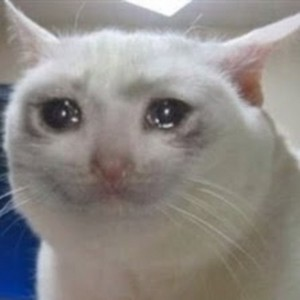